# **The *Androzoo* dataset Descirption**

#### **Load modules and the *Androzoo* dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import isfile
import seaborn as sns

In [2]:
data_path = './csv_files/merged_df_with_dates.csv'
print(isfile(data_path))
df = pd.read_csv(data_path)

True


#### Dataset info

In [3]:
df.head()

,SHA256,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_NOTIFICATIONS,ACCESS_WIFI_STATE,ADD_VOICEMAIL,ANSWER_PHONE_CALLS,BLUETOOTH_MAP,BODY_SENSORS,...,WRITE_APN_SETTINGS,WRITE_CALENDAR,WRITE_CALL_LOG,WRITE_CONTACTS,WRITE_EXTERNAL_STORAGE,WRITE_SETTINGS,is_malware,dex_date,vt_scan_date,added
0,02379AEE63FE852562189D92A9A7393282814DBA6D0FA0...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,2011-10-26 02:36:36,2020-05-18 01:37:28,2020-09-21 16:54:10.600851
1,071CAF669481D248FD5B8241568A6D0EAF2D292305AE88...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1,2014-05-13 10:27:12,2019-03-25 17:17:29,2020-01-29 13:20:19.64292
2,093693E2E711995F40C1B9E68F1A208A88DC1D58FF2270...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,2012-01-31 22:18:12,2020-08-28 22:22:55,2020-09-21 16:54:23.079571
3,0D745A4DFC489E647EF28A2B2A507D8091FFA89552BB88...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1980-01-01 08:00:00,2022-10-10 18:13:10,2022-08-20 18:49:08.100155
4,063746958A4D2B29D7C092E82B18B17D723A797D0CAC63...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,2014-07-28 22:38:00,2021-11-27 11:18:17,2014-07-31 07:27:37.05767


#### Descriptive Statistics

In [4]:
df.shape

(15712, 57)

### **Malware by date**

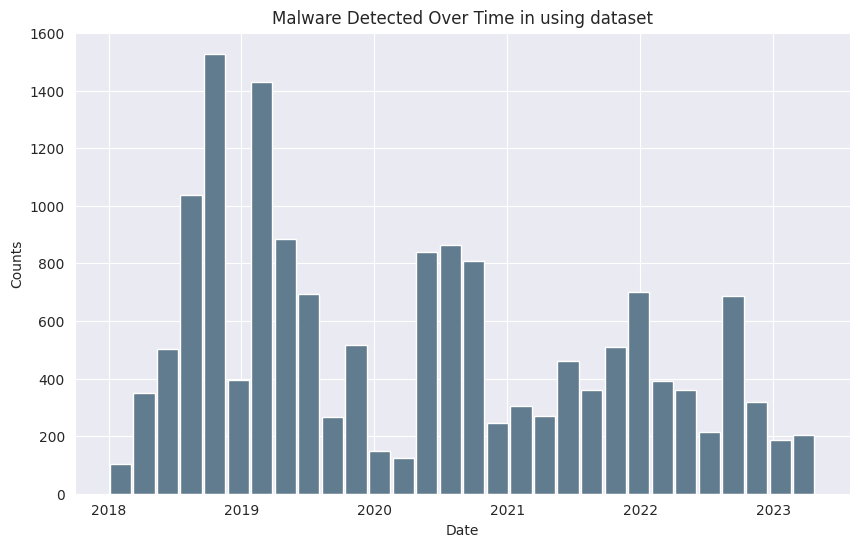

In [5]:
df['vt_scan_date'] =pd.to_datetime(df['vt_scan_date'])
plt.figure(figsize=(10, 6))
df['vt_scan_date'].hist(bins=30, rwidth=0.9, color='#607c8e')
plt.title('Malware Detected Over Time in using dataset')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.show()


In [6]:
df = df.select_dtypes(include=np.number)

### **Relationships between dataset features**

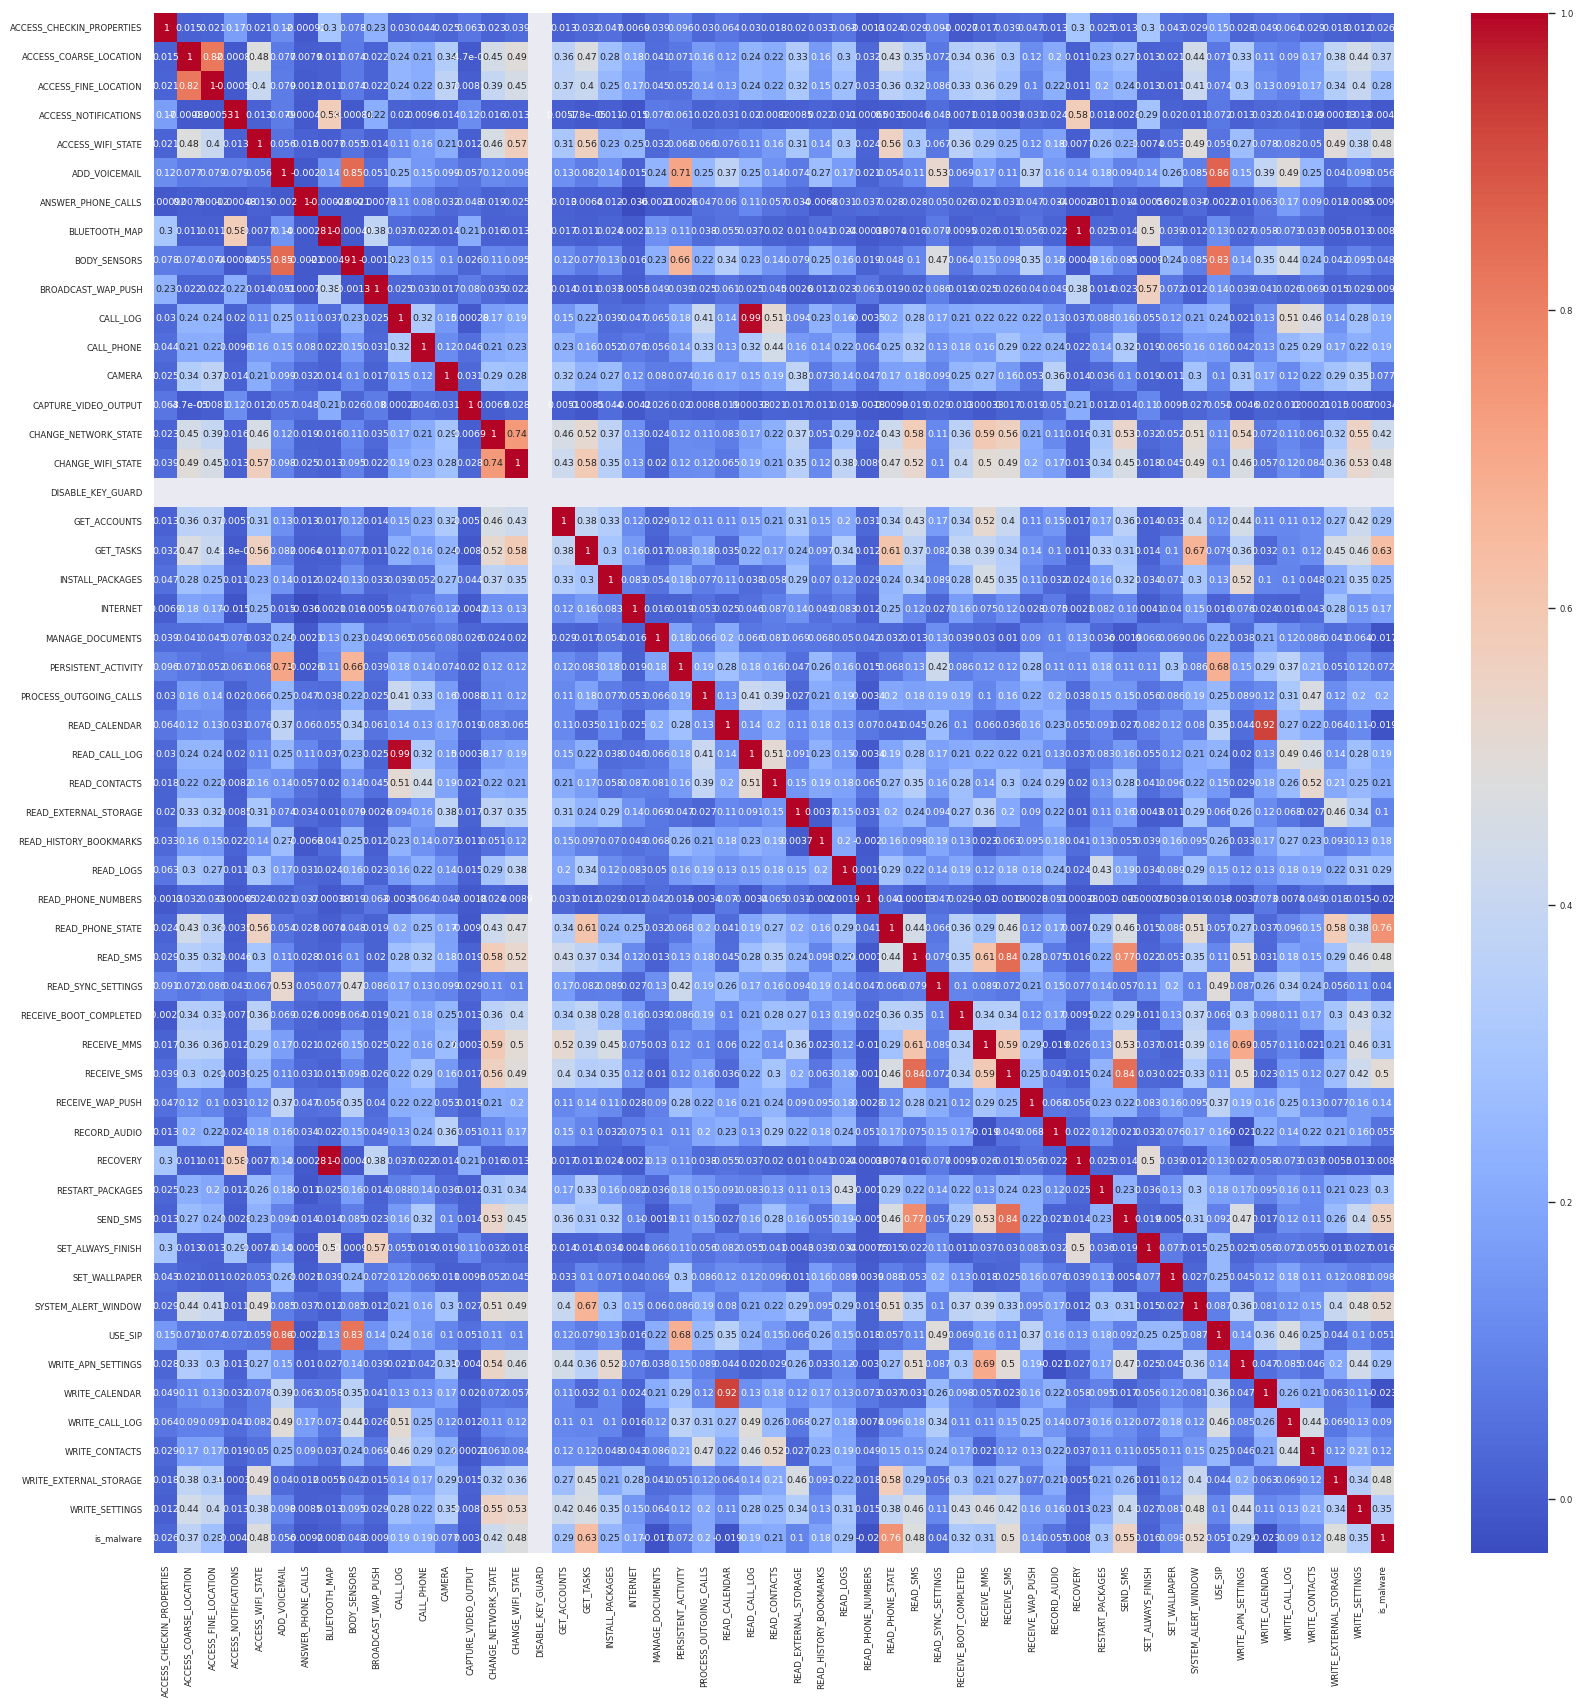

In [7]:
sns.set_context("paper", font_scale=0.7)

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [8]:
from scipy.stats import ttest_ind

ttest_results = pd.DataFrame(columns=['Feature', 'T-stat', 'P-value'])


malware = df[df['is_malware'] == 1]
non_malware = df[df['is_malware'] == 0]

for column in df.columns:
    if column != 'is_malware':
        t_stat, p_val = ttest_ind(malware[column], non_malware[column])
    ttest_results = pd.concat([ttest_results,pd.DataFrame({'Feature': column, 'T-stat': t_stat, 'P-value': p_val}, index = [0])] )
    # ttest_results = pd.merge(ttest_results, pd.DataFrame({'Feature': column, 'T-stat': t_stat, 'P-value': p_val}, ignore_index=True))

# Display the DataFrame
ttest_results = ttest_results.reset_index(drop=True).set_index('Feature').transpose()

In [9]:
ttest_results

Feature,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_NOTIFICATIONS,ACCESS_WIFI_STATE,ADD_VOICEMAIL,ANSWER_PHONE_CALLS,BLUETOOTH_MAP,BODY_SENSORS,BROADCAST_WAP_PUSH,...,SET_WALLPAPER,SYSTEM_ALERT_WINDOW,USE_SIP,WRITE_APN_SETTINGS,WRITE_CALENDAR,WRITE_CALL_LOG,WRITE_CONTACTS,WRITE_EXTERNAL_STORAGE,WRITE_SETTINGS,is_malware
T-stat,3.318738,49.783333,3.669846e+01,-0.577375,67.716228,7.027809e+00,-1.147748,1.000000,6.057953e+00,1.134120,...,1.230897e+01,75.770308,6.446416e+00,3.771140e+01,-2.934576,1.136127e+01,1.523191e+01,68.348753,46.475299,46.475299
P-value,0.000906,0.000000,5.863026e-283,0.563695,0.000000,2.184285e-12,0.251090,0.317326,1.410088e-09,0.256761,...,1.170767e-34,0.000000,1.178652e-10,5.196517e-298,0.003345,8.520985e-30,5.108931e-52,0.000000,0.000000,0.000000


In [10]:
counts_df = pd.DataFrame()

for column in df.columns:
    if column != 'is_malware':
        # Count occurrences for each permission
        grouped = df.groupby(['is_malware', column]).size()
        grouped_df = grouped.to_frame(name='count').reset_index()

        # Add a column to indicate which permission these counts correspond to
        grouped_df['permission'] = column
        grouped_df.drop(column, axis = 1, inplace = True)
     
        if counts_df.empty:
            counts_df = grouped_df
        else: 
            counts_df = pd.concat([counts_df, grouped_df], axis = 0)

### **Permissions for malware & non malware files**

In [11]:
counts_df[counts_df['is_malware']==1].reset_index(drop=True).set_index('permission').transpose()


permission,ACCESS_CHECKIN_PROPERTIES,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_NOTIFICATIONS,ACCESS_NOTIFICATIONS,ACCESS_WIFI_STATE,ACCESS_WIFI_STATE,...,WRITE_CALENDAR,WRITE_CALENDAR,WRITE_CALL_LOG,WRITE_CALL_LOG,WRITE_CONTACTS,WRITE_CONTACTS,WRITE_EXTERNAL_STORAGE,WRITE_EXTERNAL_STORAGE,WRITE_SETTINGS,WRITE_SETTINGS
is_malware,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
count,7845,11,3599,4257,4040,3816,7855,1,1928,5928,...,7733,123,7687,169,7313,543,773,7083,4603,3253


In [12]:
counts_df[counts_df['is_malware']==0].reset_index(drop=True).set_index('permission').transpose()

permission,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_FINE_LOCATION,ACCESS_NOTIFICATIONS,ACCESS_NOTIFICATIONS,ACCESS_WIFI_STATE,ACCESS_WIFI_STATE,ADD_VOICEMAIL,...,WRITE_CALENDAR,WRITE_CALENDAR,WRITE_CALL_LOG,WRITE_CALL_LOG,WRITE_CONTACTS,WRITE_CONTACTS,WRITE_EXTERNAL_STORAGE,WRITE_EXTERNAL_STORAGE,WRITE_SETTINGS,WRITE_SETTINGS
is_malware,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
count,7856,6390,1466,6148,1708,7854,2,5660,2196,7855,...,7683,173,7840,16,7703,153,4288,3568,7003,853
